Importing libraries and loading the dataset...
Displaying the first and last few rows of the dataset:
   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   
2   3.0      2.0  150.0          1750.0    3     8571.428571   
3   2.0      2.0   40.0          1250.0    2     3200.000000   
4   2.0      2.0   83.0          1200.0    2     6916.666667   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0      

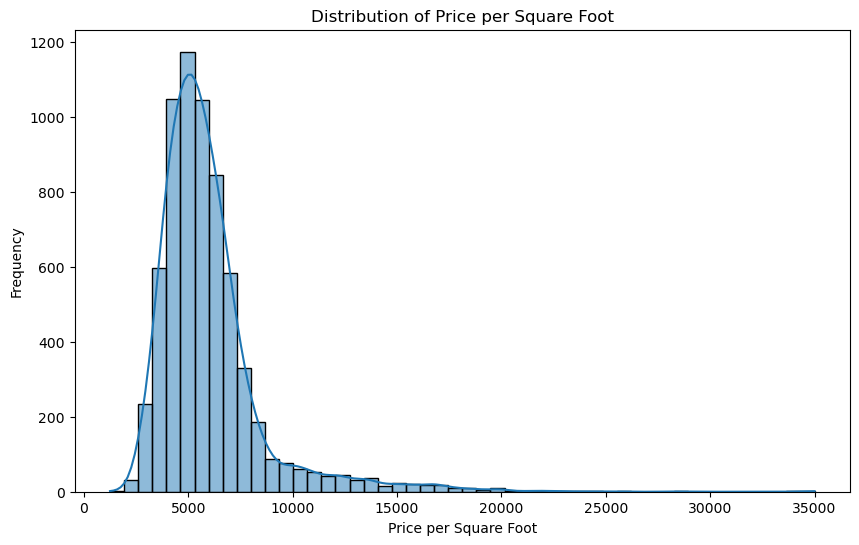

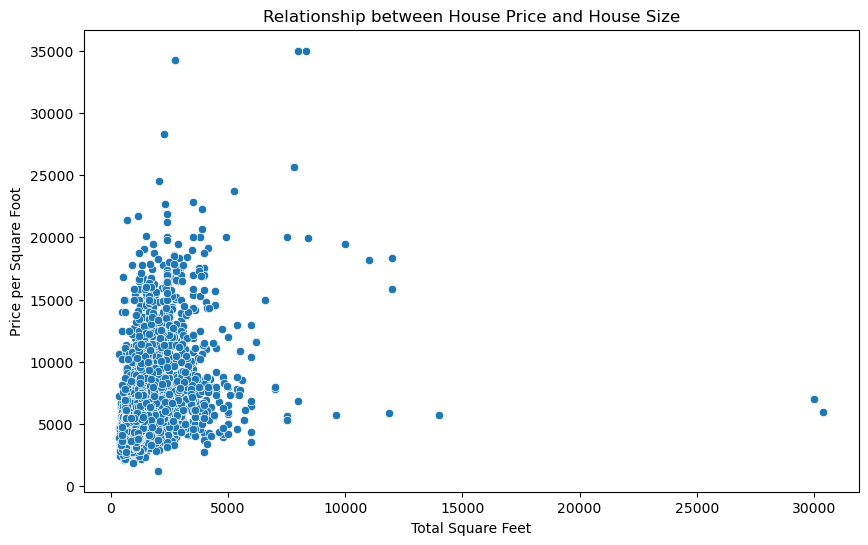

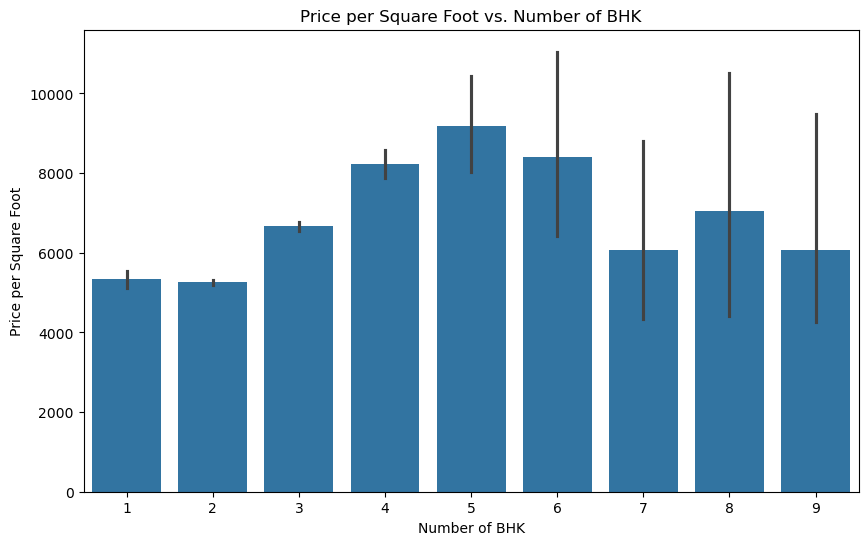


Identifying the most important features...
Top 10 Features from RandomForest:
price                            0.764515
total_sqft_int                   0.224664
balcony                          0.002102
bath                             0.001890
bhk                              0.001703
location_Rajaji Nagar            0.001097
area_typeSuper built-up  Area    0.000997
area_typePlot  Area              0.000757
availability_Ready To Move       0.000332
location_Malleshwaram            0.000284
dtype: float64

Evaluating KNN Regressor with n_neighbors=5...
R-squared value (n_neighbors=5): 0.91
Mean Squared Error (n_neighbors=5): 689417.133
Root Mean Squared Error (n_neighbors=5): 830.311

Evaluating KNN Regressor with n_neighbors=3...
R-squared value (n_neighbors=3): 0.93
Mean Squared Error (n_neighbors=3): 564011.330
Root Mean Squared Error (n_neighbors=3): 751.007

Time taken for execution: 9.55 seconds


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import time

# Timing the execution
start_time = time.time()

# Importing the dataset
print("Importing libraries and loading the dataset...")
data = pd.read_csv("G:/TOP-MENTOR/FILES/August 25th/Assignment/KNN_Project_56/KNN Assignment/bangalore house price prediction OHE-data.csv")

# Display initial rows and basic information
print("Displaying the first and last few rows of the dataset:")
print(data.head())
print(data.tail())

print("\nDataset columns:")
print(data.columns)
print("\nDataset info:")
print(data.info())

# Check for and handle null values
print("\nChecking for null values:")
print(data.isnull().sum())

# Check for and remove duplicate values
print("\nChecking for duplicate values:")
print(f"Number of duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

# Exploratory Data Analysis (EDA)
# Distribution of 'price_per_sqft'
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_sqft'], bins=50, kde=True)
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.show()

# Relationship between 'total_sqft_int' and 'price_per_sqft'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_sqft_int', y='price_per_sqft')
plt.title("Relationship between House Price and House Size")
plt.xlabel("Total Square Feet")
plt.ylabel("Price per Square Foot")
plt.show()

# Bar plot for 'bhk' vs 'price_per_sqft'
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='bhk', y='price_per_sqft')
plt.title("Price per Square Foot vs. Number of BHK")
plt.xlabel("Number of BHK")
plt.ylabel("Price per Square Foot")
plt.show()

# Feature Importance using RandomForest
print("\nIdentifying the most important features...")
X = data.drop(columns=['price_per_sqft'])
y = data['price_per_sqft']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Top 10 Features from RandomForest:")
print(feature_importances.head(10))

# KNN Regressor with n_neighbors=5
print("\nEvaluating KNN Regressor with n_neighbors=5...")
X = data[['price', 'total_sqft_int', 'bhk', 'balcony', 'bath', 'area_typeSuper built-up  Area', 'area_typePlot  Area']]
y = data['price_per_sqft']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_r2 = r2_score(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
print(f"R-squared value (n_neighbors=5): {knn_r2:.2f}")
print(f"Mean Squared Error (n_neighbors=5): {knn_mse:.3f}")
print(f"Root Mean Squared Error (n_neighbors=5): {np.sqrt(knn_mse):.3f}")

# KNN Regressor with n_neighbors=3
print("\nEvaluating KNN Regressor with n_neighbors=3...")
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train, y_train)
knn_3_pred = knn_3.predict(X_test)
knn_3_r2 = r2_score(y_test, knn_3_pred)
knn_3_mse = mean_squared_error(y_test, knn_3_pred)
print(f"R-squared value (n_neighbors=3): {knn_3_r2:.2f}")
print(f"Mean Squared Error (n_neighbors=3): {knn_3_mse:.3f}")
print(f"Root Mean Squared Error (n_neighbors=3): {np.sqrt(knn_3_mse):.3f}")

# End timing
end_time = time.time()
print(f"\nTime taken for execution: {end_time - start_time:.2f} seconds")
